# Customer Churn Prediction


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


warnings.filterwarnings('ignore')

In [61]:
df = pd.read_csv("/content/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [63]:
df = df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [64]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [65]:
df.shape

(10000, 11)

In [66]:
df.Geography.value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [67]:
df.NumOfProducts.value_counts()

,count
NumOfProducts,
1,5084
2,4590
3,266
4,60


In [68]:
df = df.replace({'France' : 0, 'Germany' : 1, 'Spain' : 2})
df = df.replace({'Male' : 1, 'Female' : 0})

In [69]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


# Data Cleaning

In [70]:
df.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [71]:
df.duplicated().sum()

np.int64(0)

In [72]:
df.shape

(10000, 11)

In [73]:
df.value_counts('Exited')

,count
Exited,
0,7963
1,2037


# Data Preprocessing

In [74]:

scaler = StandardScaler()
df[['Balance', 'EstimatedSalary']] = scaler.fit_transform(df[['Balance', 'EstimatedSalary']])


In [75]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,-1.225848,1,1,1,0.021886,1
1,608,2,0,41,1,0.117350,1,0,1,0.216534,0
2,502,0,0,42,8,1.333053,3,1,0,0.240687,1
3,699,0,0,39,1,-1.225848,2,0,0,-0.108918,0
4,850,2,0,43,2,0.785728,1,1,1,-0.365276,0


In [76]:
df['CreditScore'].max()

850

In [77]:
df['CreditScore'].min()

350

# Exploratory Data Analysis

In [78]:
categorical_cols = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

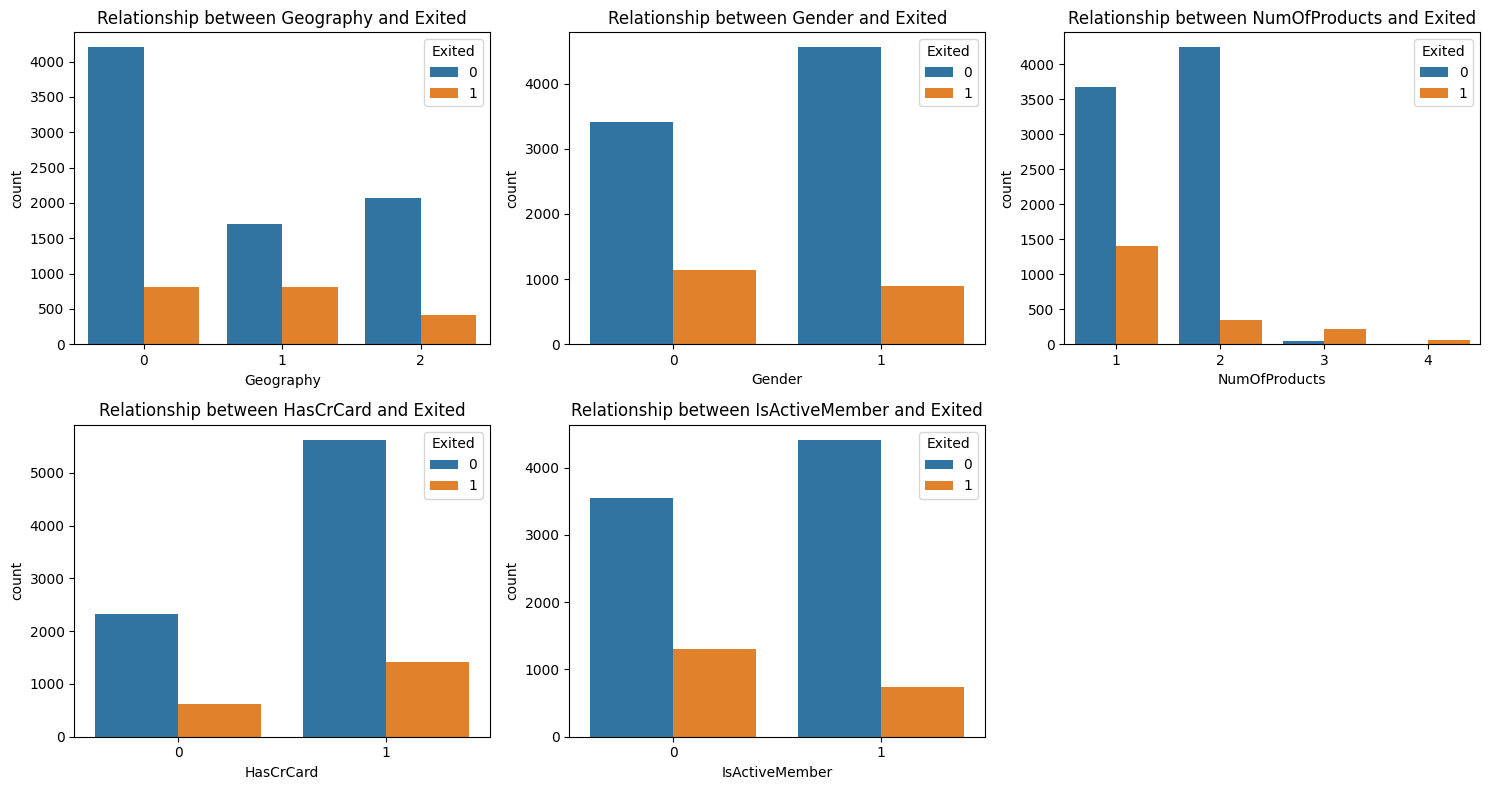

In [79]:
n_categorical = len(categorical_cols)
n_numerical = len(numerical_cols)
n_cols = 3
n_rows_cat = (n_categorical + n_cols - 1) // n_cols
n_rows_num = (n_numerical + n_cols - 1) // n_cols

fig_cat, axes_cat = plt.subplots(n_rows_cat, n_cols, figsize=(n_cols * 5, n_rows_cat * 4))
axes_cat = axes_cat.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, hue='Exited', data=df, ax=axes_cat[i])
    axes_cat[i].set_title(f'Relationship between {col} and Exited')

for j in range(i + 1, len(axes_cat)):
    fig_cat.delaxes(axes_cat[j])

plt.tight_layout()
plt.show()

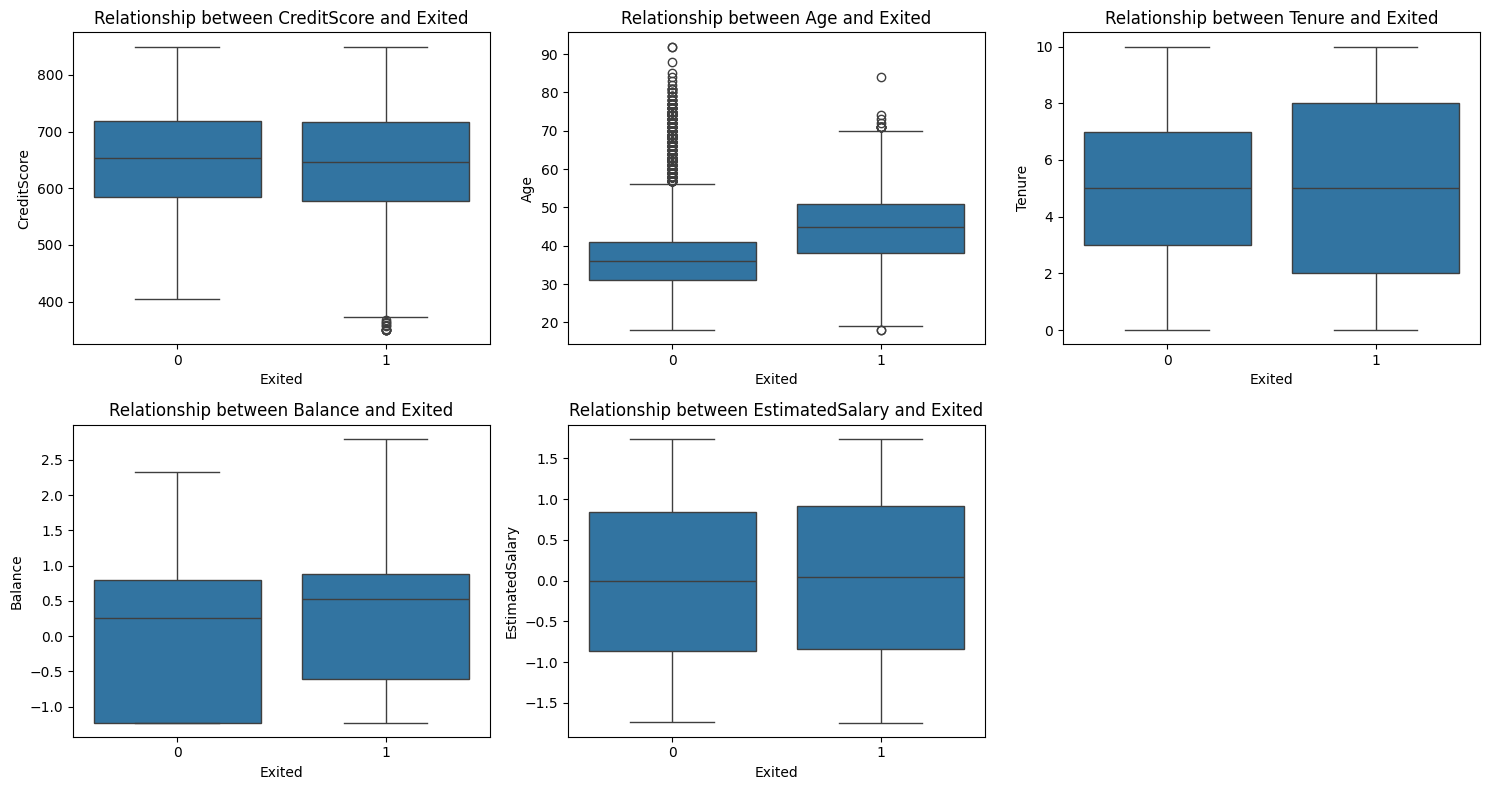

In [80]:
fig_num, axes_num = plt.subplots(n_rows_num, n_cols, figsize=(n_cols * 5, n_rows_num * 4))
axes_num = axes_num.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x='Exited', y=col, data=df, ax=axes_num[i])
    axes_num[i].set_title(f'Relationship between {col} and Exited')

for j in range(i + 1, len(axes_num)):
    fig_num.delaxes(axes_num[j])

plt.tight_layout()
plt.show()

In [81]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,-1.225848,1,1,1,0.021886,1
1,608,2,0,41,1,0.117350,1,0,1,0.216534,0
2,502,0,0,42,8,1.333053,3,1,0,0.240687,1
3,699,0,0,39,1,-1.225848,2,0,0,-0.108918,0
4,850,2,0,43,2,0.785728,1,1,1,-0.365276,0


# Applying Transformation to Age

In [82]:

scaler = MinMaxScaler()
df['Age_minmax'] = scaler.fit_transform(df[['Age']])

In [83]:
df = df.drop('Age', axis=1)

In [84]:
df.head()

,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_minmax
0,619,0,0,2,-1.225848,1,1,1,0.021886,1,0.324324
1,608,2,0,1,0.117350,1,0,1,0.216534,0,0.310811
2,502,0,0,8,1.333053,3,1,0,0.240687,1,0.324324
3,699,0,0,1,-1.225848,2,0,0,-0.108918,0,0.283784
4,850,2,0,2,0.785728,1,1,1,-0.365276,0,0.337838


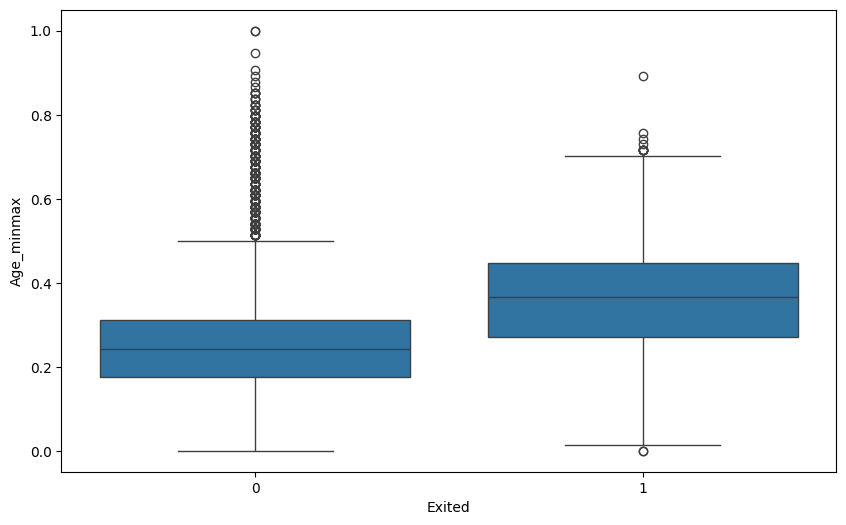

In [85]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Exited', y="Age_minmax", data=df)
plt.show()

# Splitting the data

In [87]:
x = df.drop('Exited', axis=1)
y = df['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [88]:

models = {
    'Logistic Regression': LogisticRegression(solver='liblinear'),
    'Random Forest': RandomForestClassifier(n_estimators=300, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, random_state=42)
}

# Training the Models

In [89]:
for model_name, model in models.items():
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)

  accuracy = accuracy_score(y_test, y_pred)

  print("Model Name : ", model_name)
  print()

  print("Confusion Matrix:")
  print(confusion_matrix(y_test, y_pred))
  print()

  print(f"Model Accuracy: {accuracy*100:.2f}")

  print("\nClassification Report:")
  print(classification_report(y_test, y_pred))
  print()

Model Name :  Logistic Regression

Confusion Matrix:
[[1558   35]
 [ 353   54]]

Model Accuracy: 80.60

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1593
           1       0.61      0.13      0.22       407

    accuracy                           0.81      2000
   macro avg       0.71      0.56      0.55      2000
weighted avg       0.77      0.81      0.75      2000


Model Name :  Random Forest

Confusion Matrix:
[[1533   60]
 [ 219  188]]

Model Accuracy: 86.05

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.76      0.46      0.57       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000


Model Name :  Gradient Boosting

Confusion Matrix:
[[1538   55]
 [ 204  203]]

Model Accuracy: 8

In [90]:
best_accuracy = 0
best_model_name = ""

for model_name, model in models.items():
  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_test, y_pred)

  if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_model_name = model_name

print("Best Model : ", best_model_name)
print(f"Best Model Accuracy: {best_accuracy*100:.2f}")

Best Model :  Gradient Boosting
Best Model Accuracy: 87.05


# Training without considering Age


In [91]:
x1 = df.drop({'Exited', 'Age_minmax'}, axis=1)
y1 = df['Exited']

x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2, random_state=42, stratify=y)

In [92]:
for model_name, model in models.items():
  model.fit(x_train1, y_train1)
  y_pred1 = model.predict(x_test1)

  accuracy = accuracy_score(y_test1, y_pred1)

  print("Model Name : ", model_name)
  print()

  print("Confusion Matrix:")
  print(confusion_matrix(y_test1, y_pred1))
  print()

  print(f"Model Accuracy: {accuracy*100:.2f}")

  print("\nClassification Report:")
  print(classification_report(y_test1, y_pred1))
  print()

Model Name :  Logistic Regression

Confusion Matrix:
[[1593    0]
 [ 405    2]]

Model Accuracy: 79.75

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       1.00      0.00      0.01       407

    accuracy                           0.80      2000
   macro avg       0.90      0.50      0.45      2000
weighted avg       0.84      0.80      0.71      2000


Model Name :  Random Forest

Confusion Matrix:
[[1513   80]
 [ 271  136]]

Model Accuracy: 82.45

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1593
           1       0.63      0.33      0.44       407

    accuracy                           0.82      2000
   macro avg       0.74      0.64      0.67      2000
weighted avg       0.80      0.82      0.80      2000


Model Name :  Gradient Boosting

Confusion Matrix:
[[1537   56]
 [ 288  119]]

Model Accuracy: 8

In [93]:
best_accuracy = 0
best_model_name = ""

for model_name, model in models.items():
  y_pred1 = model.predict(x_test1)
  accuracy = accuracy_score(y_test1, y_pred1)

  if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_model_name = model_name

print("Best Model : ", best_model_name)
print(f"Best Model Accuracy: {best_accuracy*100:.2f}")

Best Model :  Gradient Boosting
Best Model Accuracy: 82.80
